## Setup

In [13]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 

def read_results(df, target_list, runs = 10):
    nr_of_objects = len(target_list)
    tot_exp = runs * nr_of_objects
    result_dict = {}
    total_succes = 0

    for target in target_list:
        targetDF = df[df['Target']== target].copy()
        # display(targetDF)

        # faildf = targetDF[targetDF['Success'] == False]
        # if not faildf.empty:
        #     display(faildf)

        success_count = targetDF['Success'].values.sum()
        isofail_count = targetDF.FailReason.str.count("tooManyIsolationSteps").sum()
        ntintt_count = targetDF.FailReason.str.count("nonTargetinTargetTray").sum()
        tinntt_count = targetDF.FailReason.str.count("targetInNonTargetTray").sum()
        tbcl_count = targetDF.FailReason.str.count("tableCleared").sum()
        conftolo_count = targetDF.FailReason.str.count("confTooLow").sum()
        gff_count = targetDF.FailReason.str.count("graspFindFail").sum()

        total_succes += success_count

        # if not targetDF.empty:
        #     if target in ["Banana", "Hammer", "Pear"]: t="\t\t" 
        #     else: t = "\t"
        #     print("{} {} ({}/10)".format(target, t, success_count))

        obj = {
                "succ": success_count,
                "t_ntt": tinntt_count,
                "nt_tt": ntintt_count,
                "tb_cl": tbcl_count,
                "conf": conftolo_count,
                "gff": gff_count,
                "iso": isofail_count
            }
        result_dict[target] = obj

    print("Overall performance: ({} / {}) = {:.2f}\n".format(total_succes, tot_exp, (total_succes/tot_exp)))

    return result_dict

def setup_bar_chart():

    plt.rcParams["figure.figsize"] = (20,7)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'

    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 22

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    

def return_chart_data(result_dict):
    successes = []
    nonTarget = []
    tableClear = []
    targetNonTargetTray = []
    confTooLow = []
    graspFind = []
    isoFail = []

    for key, values in result_dict.items():
        # if key == "Banana" or key == "Hammer" or key == "Pear": t="\t\t" 
        # else: t = "\t"
        # print(key, t, values)

        successes.append(values['succ']*10)
        targetNonTargetTray.append(values['t_ntt']*10)
        nonTarget.append(values['nt_tt']*10)
        tableClear.append(values['tb_cl']*10)
        confTooLow.append(values['conf']*10)
        graspFind.append(values['gff']*10)
        isoFail.append(values['iso']*10)
    
    return successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail

def make_success_chart(labels, successes, scenario):
    width = 0.7
    c_succ = '#62983d' #'#77a041'
    
    fig, ax = plt.subplots()
    ax.set_facecolor('gainsboro')

    ax.set_ylim([0, 105])
    plt.xticks(rotation=45, ha='right')
    # plt.yticks([10,20,30,40,50,60,70,80,90,100])
    ax.set_axisbelow(True)
    ax.grid(axis='y', color = 'darkgrey')

    ax.bar(labels, successes, width, label='Success rate', color=c_succ)

    ax.set_ylabel('Success rate (%)')
    ax.set_xlabel('Object')
    ax.set_title(scenario + ' experiment results per object (10 runs)', x=0.5, y=1.1)
    # ax.legend(loc='best')
    # ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.show()

def make_fail_chart(labels, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, scenario, width = 0.7):

    c_t_ntt = '#dacf6e'
    c_nt_tt = '#dfa239' #'#e29932'
    c_gr = '#e19999' #'#d77b29' #'#d56b23'
    c_conf = '#e25d63'
    c_iso =  '#c83c3e'# '#d1474a'#'#cd4244' 
    c_tb_cl = '#7aadd6'
    
    fig, ax = plt.subplots()
    ax.set_facecolor('gainsboro')
    ax.set_axisbelow(True)
    ax.grid(axis='y', color = 'darkgrey')

    ax.set_ylim([0, 105])
    plt.xticks(rotation=45, ha='right')

    ax.bar(labels, targetNonTargetTray, width, label='Target in NonTargetTray', color = c_t_ntt)

    ax.bar(labels, nonTarget, width, bottom=targetNonTargetTray, label='NonTarget in TargetTray', color = c_nt_tt)
    newBottom = [a + b for a, b in zip(targetNonTargetTray, nonTarget)]

    if sum(graspFind) != 0:
        ax.bar(labels, graspFind, width, bottom= newBottom, label='Failed To Find Grasp Point Threshold', color = c_gr)
        newBottom = [a + b for a, b in zip(newBottom, graspFind)]
    if sum(confTooLow) != 0:
        ax.bar(labels, confTooLow, width, bottom= newBottom, label='Detection Confidence Too Low', color = c_conf)
        newBottom = [a + b for a, b in zip(newBottom, confTooLow)]
    if sum(isoFail) != 0:
        ax.bar(labels, isoFail, width, bottom= newBottom, label='Too Many Isolation Steps', color= c_iso)
        newBottom = [a + b for a, b in zip(newBottom, isoFail)]
    if sum(tableClear) != 0:
        ax.bar(labels, tableClear, width, bottom= newBottom, label='Target Out of Detection Area', color = c_tb_cl)
    

    
    
    ax.set_ylabel('Failed experiments (%)')
    ax.set_xlabel('Object')
    ax.set_title(scenario + ' experiment fail reason per object (10 runs)', x=0.5, y=1.1)
    ax.legend(loc='upper right')
    # ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.show()

# suc = df[df['Success'] == True].groupby(['Target'])['Success'].count()
# fail = df[df['Success'] == False].groupby(['Target'])['Success'].count()


# Separate cells

## Isolated

Overall performance: (150 / 160) = 0.94



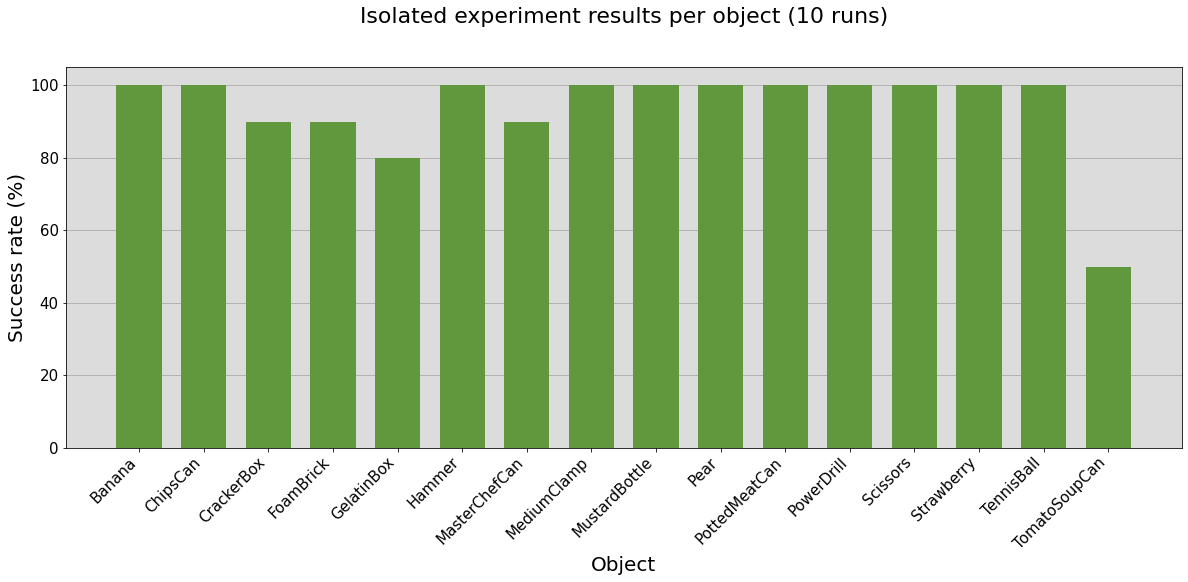

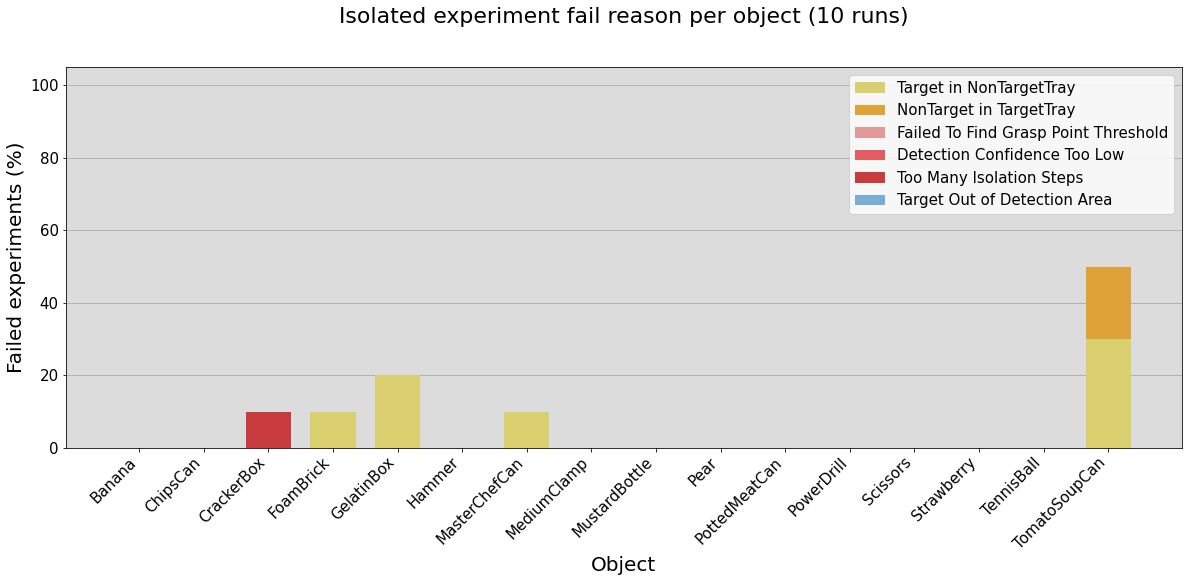

In [5]:
target_list = ['Banana', 'ChipsCan', 'CrackerBox', 'FoamBrick', 'GelatinBox', 'Hammer', 
                    'MasterChefCan', 'MediumClamp', 'MustardBottle', 'Pear', 'PottedMeatCan', 'PowerDrill', 
                    'Scissors', 'Strawberry', 'TennisBall', 'TomatoSoupCan']

# for i in range(11):
#     i +=1
#     df = pd.read_pickle('results/targeted_4isolated/isolated_target_' + str(i) + '/results')
#     result_dict = read_results(df, target_list)
#     successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)

df = pd.read_pickle('results/best/isolated_target/results')
setup_bar_chart()
result_dict = read_results(df, target_list)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
make_success_chart(target_list, successes, 'Isolated')
make_fail_chart(target_list, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Isolated')

## Packed

Overall performance: (142 / 160) = 0.89



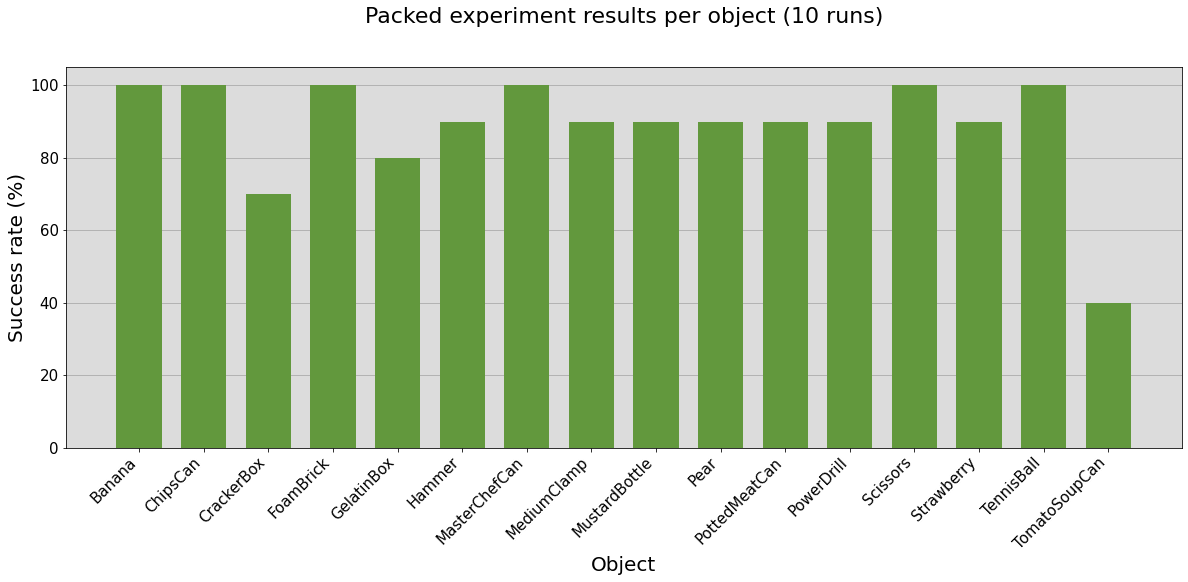

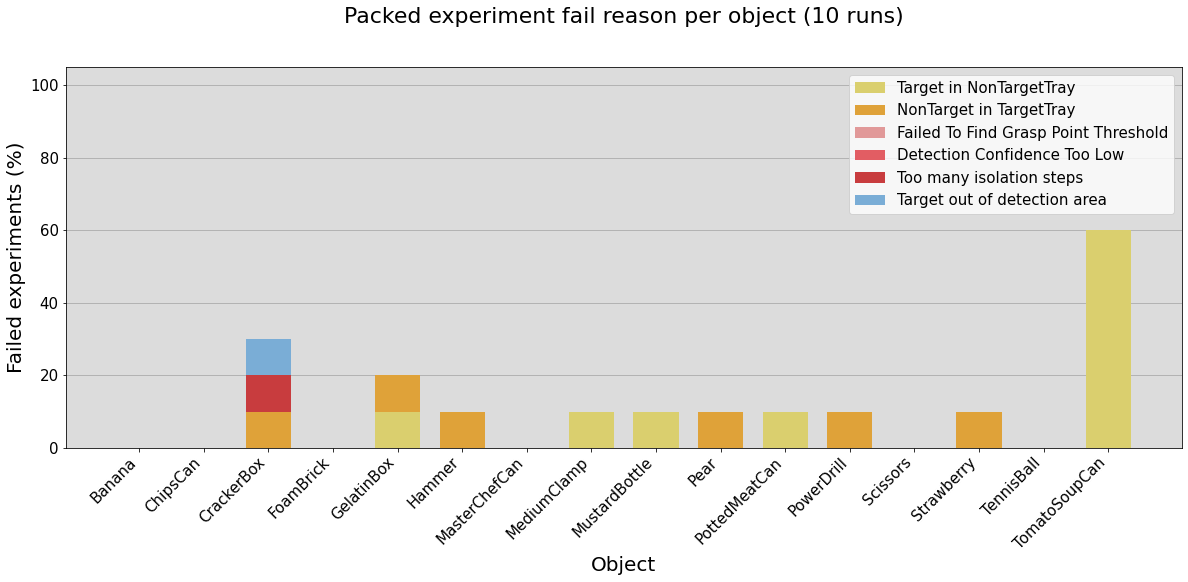

In [37]:
target_list = ['Banana', 'ChipsCan', 'CrackerBox', 'FoamBrick', 'GelatinBox', 'Hammer', 
                    'MasterChefCan', 'MediumClamp', 'MustardBottle', 'Pear', 'PottedMeatCan', 'PowerDrill', 
                    'Scissors', 'Strawberry', 'TennisBall', 'TomatoSoupCan']

# for i in range(8):
#     i +=1
#     df = pd.read_pickle('results/targeted_pack/targeted_pack_' + str(i) + '/results')
#     result_dict = read_results(df, target_list)
#     successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)

df = pd.read_pickle('results/best/targeted_pack/results')
setup_bar_chart()
result_dict = read_results(df, target_list)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
make_success_chart(target_list, successes, 'Packed')
make_fail_chart(target_list, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Packed')

## Piled

Overall performance: (128 / 150) = 0.85



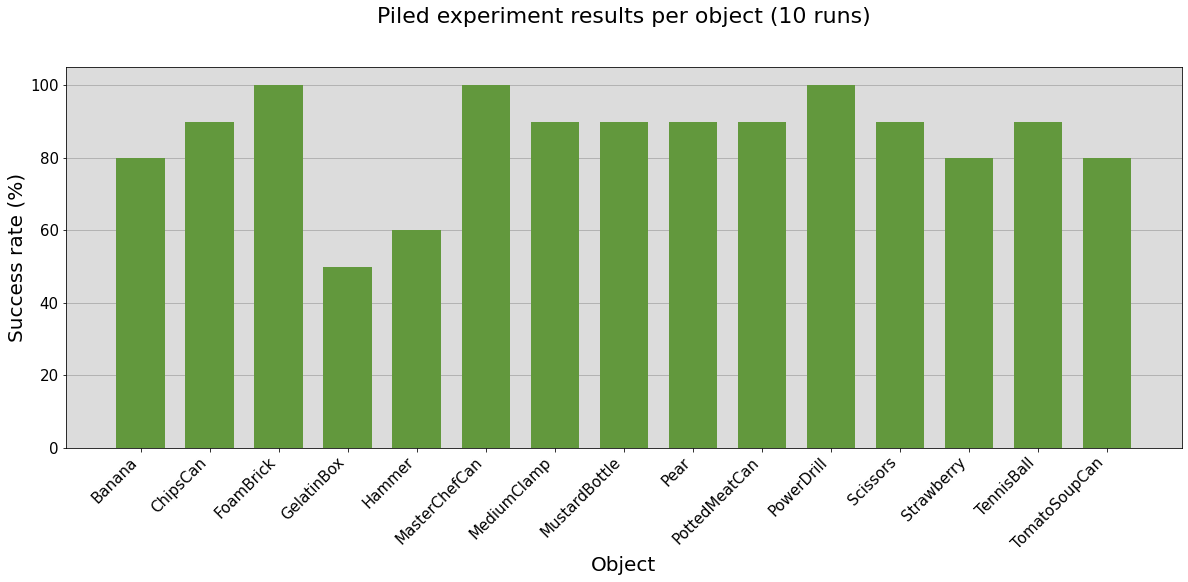

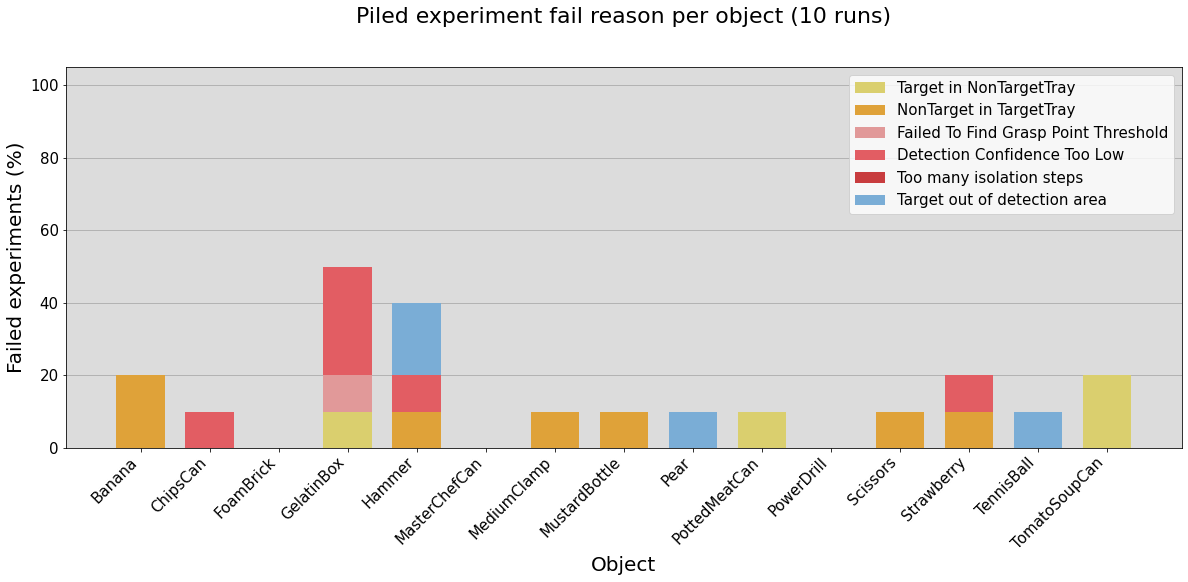

In [39]:
target_list = ['Banana', 'ChipsCan', 'FoamBrick', 'GelatinBox', 'Hammer', 
                    'MasterChefCan', 'MediumClamp', 'MustardBottle', 'Pear', 'PottedMeatCan', 'PowerDrill', 
                    'Scissors', 'Strawberry', 'TennisBall', 'TomatoSoupCan']

# for i in range(15):
#     i +=1
#     df = pd.read_pickle('results/targeted_pile/targeted_pile_' + str(i) + '/results')
#     result_dict = read_results(df, target_list)
#     successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)

df = pd.read_pickle('results/best/targeted_pile/results')
setup_bar_chart()
result_dict = read_results(df, target_list)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
make_success_chart(target_list, successes, 'Piled')
make_fail_chart(target_list, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Piled')

## Clutter

Clutter results
Overall performance: (24 / 30) = 0.80



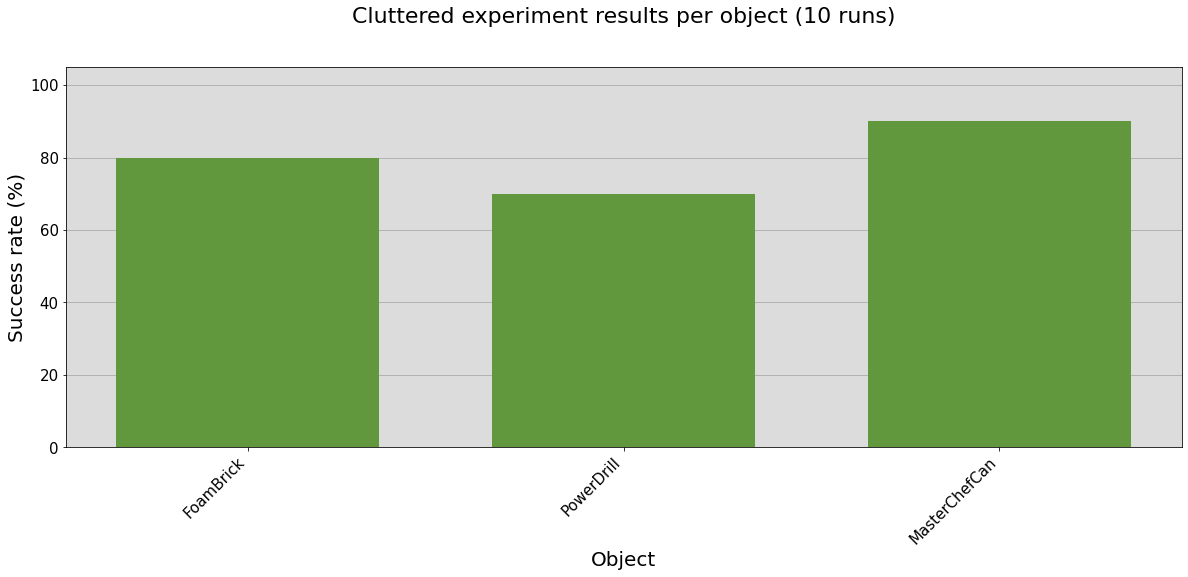

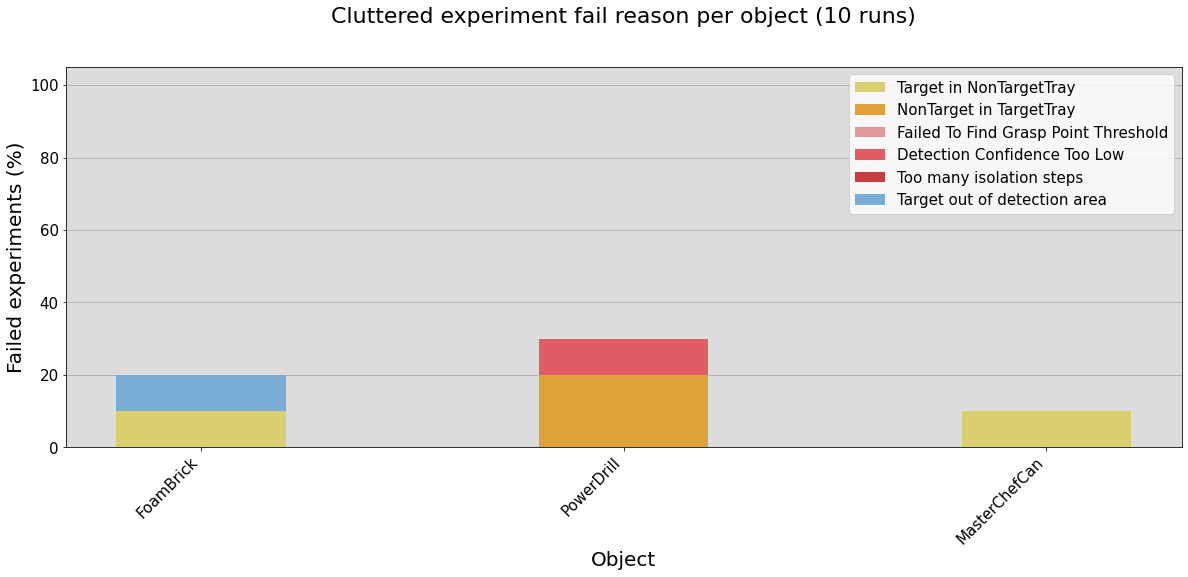

In [41]:
print('Clutter results')
# target_list_clutter = ['FoamBrick', 'MediumClamp', 'Pear', 'PowerDrill', 'Strawberry', 'MasterChefCan']
target_list_clutter = ['FoamBrick', 'PowerDrill', 'MasterChefCan']

# for i in range(9):
#     i +=1 
#     df = pd.read_pickle('results/targeted_clutter/targeted_clutter_' + str(i) + '/results')
#     result_dict = read_results(df, target_list_clutter)
#     successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)

df = pd.read_pickle('results/best/targeted_clutter/results')
setup_bar_chart()
result_dict = read_results(df, target_list_clutter)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
make_success_chart(target_list_clutter, successes, 'Cluttered')
make_fail_chart(target_list_clutter, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Cluttered', 0.4)

# Final results generation

## All except clutter

Overall performance: (150 / 160) = 0.94



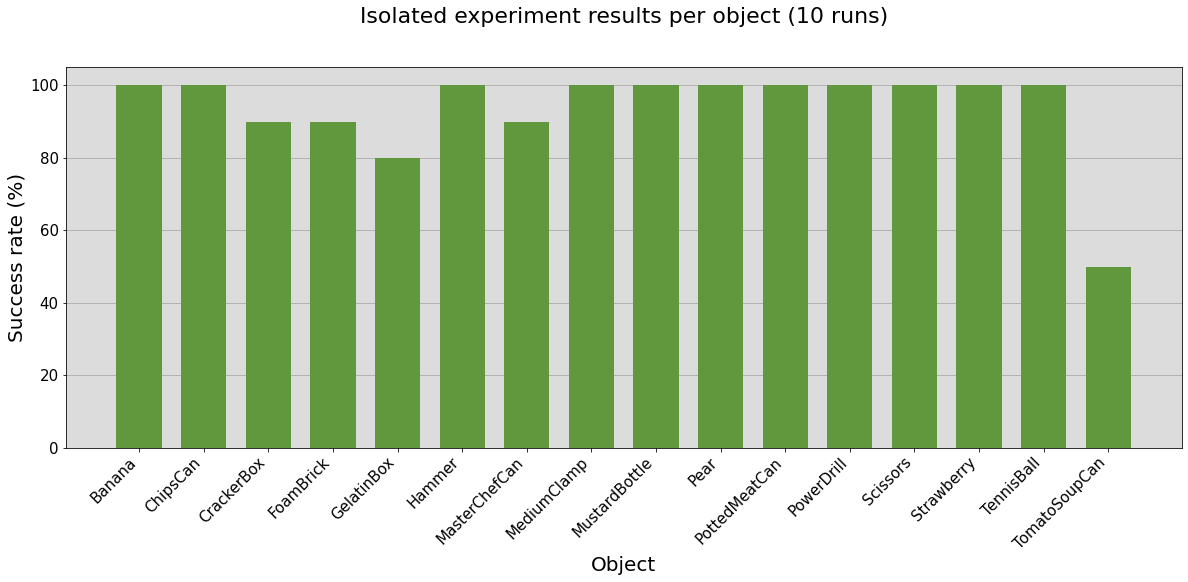

graspFind [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] tableClear [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


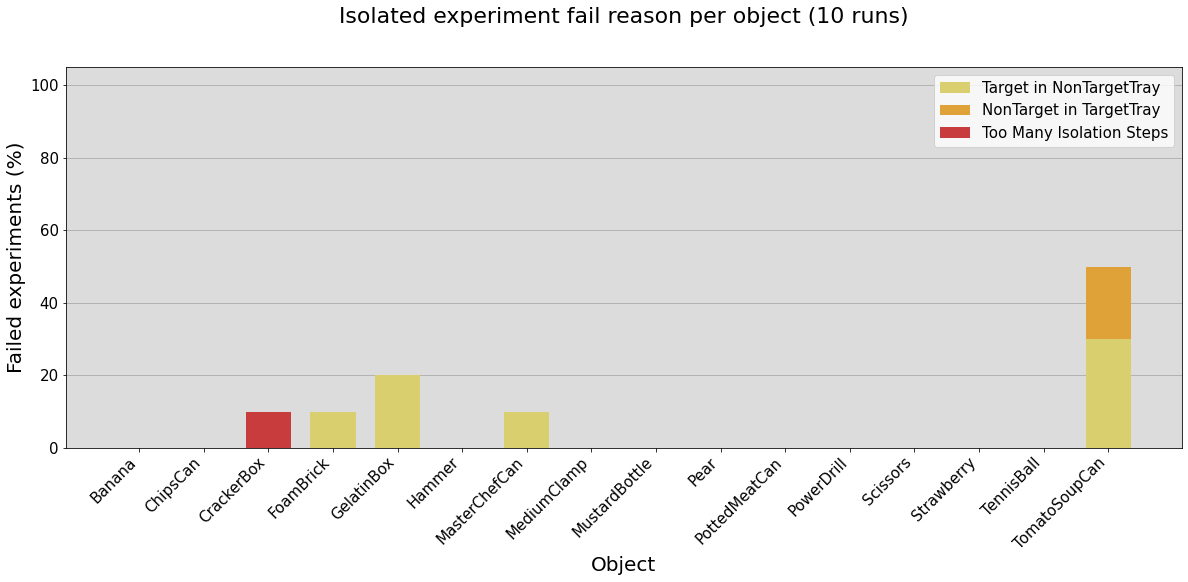

Overall performance: (142 / 160) = 0.89



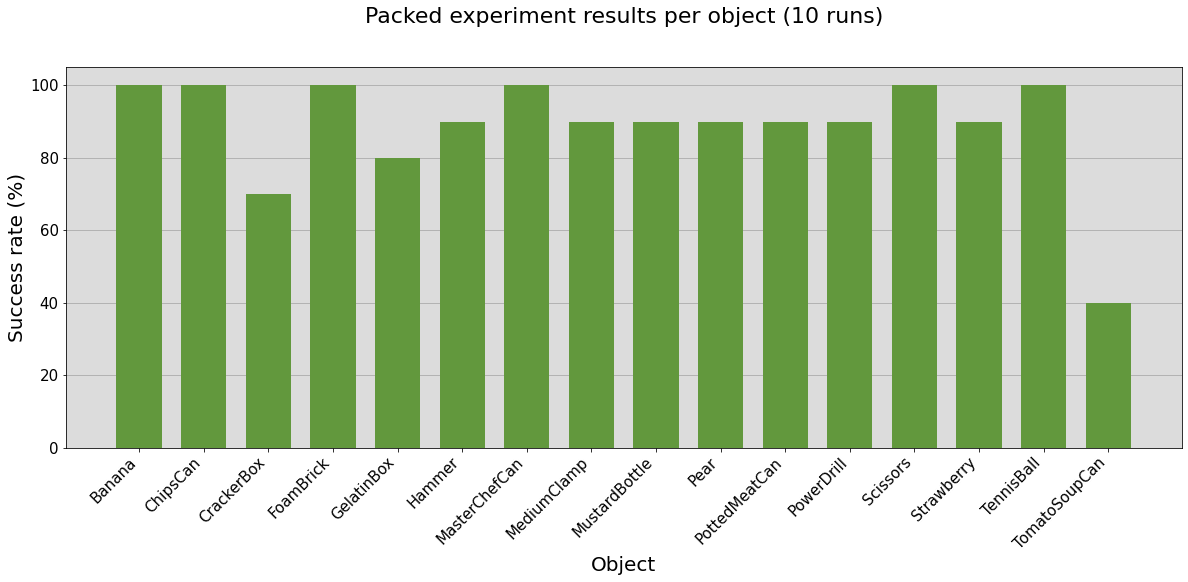

graspFind [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] tableClear [0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


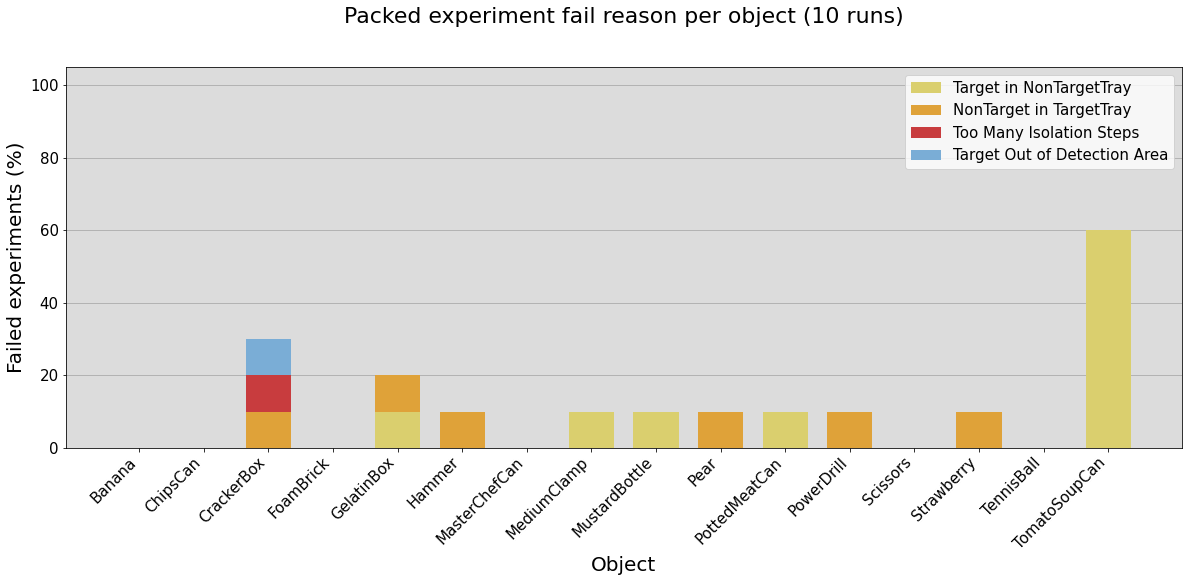

Overall performance: (128 / 150) = 0.85



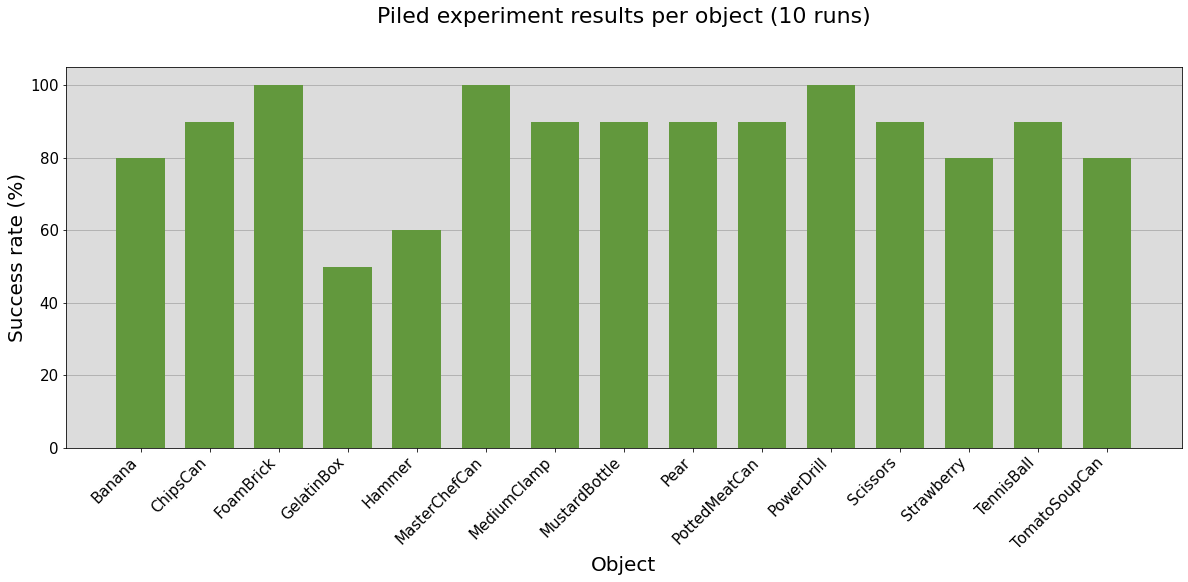

graspFind [0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] tableClear [0, 0, 0, 0, 20, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0]
10


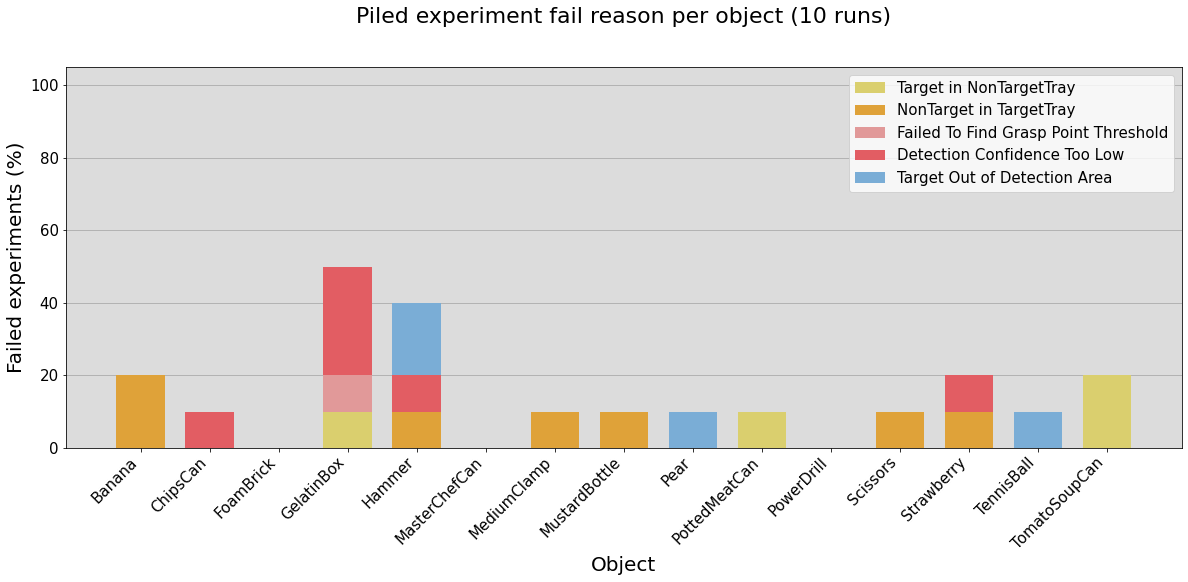

In [14]:
target_list = ['Banana', 'ChipsCan', 'CrackerBox', 'FoamBrick', 'GelatinBox', 'Hammer', 
                    'MasterChefCan', 'MediumClamp', 'MustardBottle', 'Pear', 'PottedMeatCan', 'PowerDrill', 
                    'Scissors', 'Strawberry', 'TennisBall', 'TomatoSoupCan']

## ISO

df = pd.read_pickle('results/best/isolated_target/results')
result_dict = read_results(df, target_list)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
setup_bar_chart()
make_success_chart(target_list, successes, 'Isolated')
make_fail_chart(target_list, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Isolated')

## PACK

df = pd.read_pickle('results/best/targeted_pack/results')
result_dict = read_results(df, target_list)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
setup_bar_chart()
make_success_chart(target_list, successes, 'Packed')
make_fail_chart(target_list, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Packed')

## PILE

target_list.remove('CrackerBox')

df = pd.read_pickle('results/best/targeted_pile/results')
result_dict = read_results(df, target_list)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
setup_bar_chart()
make_success_chart(target_list, successes, 'Piled')
make_fail_chart(target_list, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Piled')

## Clutter perfomance graphs

Overall performance: (24 / 30) = 0.80



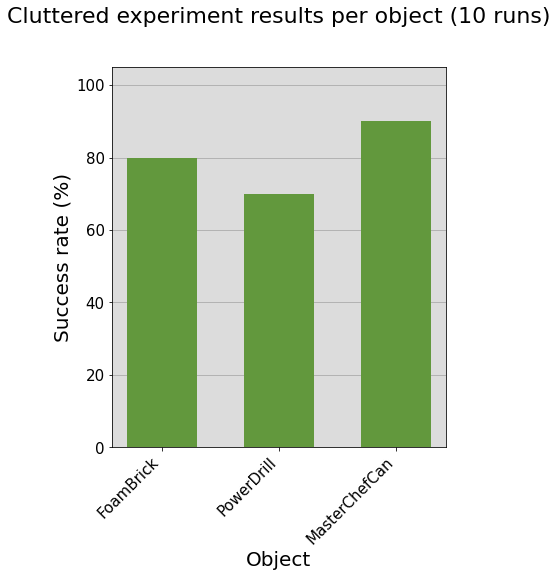

graspFind [0, 0, 0] tableClear [10, 0, 0]
0


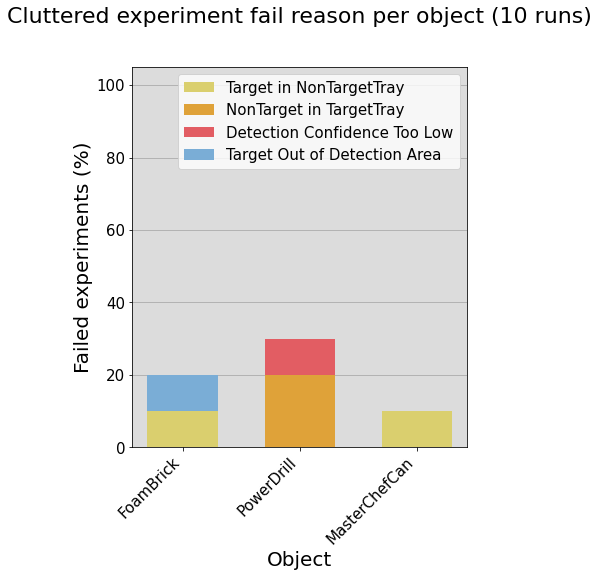

In [15]:
## CLUTTER

target_list_clutter = ['FoamBrick', 'PowerDrill', 'MasterChefCan']

plt.rcParams["figure.figsize"] = (6,7)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
width = 0.6

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def make_clutter_success_chart(labels, successes, scenario):
    # width = 0.5
    c_succ = '#62983d' #'#77a041'
    
    fig, ax = plt.subplots()
    ax.set_facecolor('gainsboro')

    ax.set_ylim([0, 105])
    plt.xticks(rotation=45, ha='right')
    # plt.yticks([10,20,30,40,50,60,70,80,90,100])
    ax.set_axisbelow(True)
    ax.grid(axis='y', color = 'darkgrey')

    ax.bar(labels, successes, width, label='Success rate', color=c_succ)

    ax.set_ylabel('Success rate (%)')
    ax.set_xlabel('Object')
    ax.set_title(scenario + ' experiment results per object (10 runs)', x=0.5, y=1.1)
    # ax.legend(loc='best')
    # ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.show()

df = pd.read_pickle('results/best/targeted_clutter/results')
result_dict = read_results(df, target_list_clutter)
successes, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail = return_chart_data(result_dict)
# setup_bar_chart(True)
make_clutter_success_chart(target_list_clutter, successes, 'Cluttered')
make_fail_chart(target_list_clutter, targetNonTargetTray, nonTarget, tableClear, confTooLow, graspFind, isoFail, 'Cluttered', width)

## Vis-Succ graph piled

In [ ]:
##################
## Make vis graph
##################

df = pd.read_pickle('results/best/targeted_pile/results')

# df = pd.read_pickle('results/best/targeted_clutter/results')
# used_objects = ['FoamBrick', 'PowerDrill', 'MasterChefCan']
# df = df[df.Target.isin(used_objects)]

width = 4

success_rates = []
fail_rates = []
amounts = []
totals = []


# display(df)

for i in range(10):
    j = (i+1)*0.1
    k = i*0.1

    if j == 1.0: visDF = df[df['TargetVisibility'] <= j].copy()
    else: visDF = df[df['TargetVisibility'] < j].copy()
    visDF = visDF[visDF['TargetVisibility'] >= k].copy()
    success = visDF['Success'].values.sum()
    total = len(visDF.index)

    s_amount = success
    f_amount = total-success
    if total != 0:
        s_rate = round(success / total,2)*100
        f_rate = round((total-success) / total,2)*100
    else:
        s_rate = 0
        f_rate = 0

    success_rates.append(s_rate)
    fail_rates.append(f_rate)
    amounts.append((s_amount, f_amount))
    totals.append(total)

# vis = ['0-10', '10-20' , '20-30', '30-40', '40-50', '50-60', '60-70', '70-80' , '80-90', '90-100']
vis = [4,14,24,34,44,54,64,74,84,94]

print(totals)
print(success_rates)

fig, ax = plt.subplots()
ax.set_facecolor('gainsboro')
ax2 = ax.twinx()
ax2.set_ylabel('Number of experiments')

#--------------------#

## styling
c_succ = '#62983d'
# c_fail = '#e19999'
c_values = '#7aadd6' #'#dfa239' # '#dacf6e'  

#--------------------#

## vertical

ax.set_ylim([0, 105])
ax2.set_ylim([0, 33.6])
# ax2.set_ylim([0,10.5])
# ax2.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([6,16,26,36,46,56,66,76,86,96])
ax.set_xticklabels(['0-10', '10-20' , '20-30', '30-40', '40-50', '50-60', '60-70', '70-80' , '80-90', '90-100'])
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 10
ax2.yaxis.labelpad = 20

ax.set_axisbelow(True)
# ax.grid(axis='y', color = 'darkgrey')

ax.bar(vis, success_rates, width, label='Success rate', color=c_succ)
newVis = [a + width for a in vis]
# ax2.scatter(vis, totals, label='Number of exp', marker='s', color = c_values, linewidths=10)
# ax2.plot(vis, totals, label='Number of exp', color = c_values, linewidth = 4)
tot = ax2.bar(newVis, totals, width, label='Number of exp', color = c_values)
ax2.bar_label(tot, color='gainsboro', label_type='center')

ax.set_ylabel('Performance (%)')
ax.set_xlabel('Object visibility (%)')
ax.set_title('Piled experiment success rate relative to object visibility (15 objects, 10 runs each)', x=0.5, y=1.1)

# ax.legend(loc = 'upper center')
# ax2.legend(loc = 'upper center')
# ax2.legend(loc='upper center')



## Vis-Succ graph clutter

In [ ]:
##################
## Make vis graph
##################

# df = pd.read_pickle('results/best/targeted_pile/results')

df = pd.read_pickle('results/best/targeted_clutter/results')
used_objects = ['FoamBrick', 'PowerDrill', 'MasterChefCan']
df = df[df.Target.isin(used_objects)]

width = 4

success_rates = []
fail_rates = []
amounts = []
totals = []


# display(df)

for i in range(10):
    j = (i+1)*0.1
    k = i*0.1

    if j == 1.0: visDF = df[df['TargetVisibility'] <= j].copy()
    else: visDF = df[df['TargetVisibility'] < j].copy()
    visDF = visDF[visDF['TargetVisibility'] >= k].copy()
    success = visDF['Success'].values.sum()
    total = len(visDF.index)

    s_amount = success
    f_amount = total-success
    if total != 0:
        s_rate = round(success / total,2)*100
        f_rate = round((total-success) / total,2)*100
    else:
        s_rate = 0
        f_rate = 0

    success_rates.append(s_rate)
    fail_rates.append(f_rate)
    amounts.append((s_amount, f_amount))
    totals.append(total)

# vis = ['0-10', '10-20' , '20-30', '30-40', '40-50', '50-60', '60-70', '70-80' , '80-90', '90-100']
vis = [4,14,24,34,44,54,64,74,84,94]

print(totals)
print(success_rates)

fig, ax = plt.subplots()
ax.set_facecolor('gainsboro')
ax2 = ax.twinx()
ax2.set_ylabel('Number of experiments')

#--------------------#

## styling
c_succ = '#62983d'
# c_fail = '#e19999'
c_values = '#7aadd6' #'#dfa239' # '#dacf6e'  

#--------------------#

## vertical

ax.set_ylim([0, 105])
# ax2.set_ylim([0, 33.6])
ax2.set_ylim([0,10.5])
# ax2.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([6,16,26,36,46,56,66,76,86,96])
ax.set_xticklabels(['0-10', '10-20' , '20-30', '30-40', '40-50', '50-60', '60-70', '70-80' , '80-90', '90-100'])
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 10
ax2.yaxis.labelpad = 20

ax.set_axisbelow(True)
ax.grid(axis='y', color = 'darkgrey')

ax.bar(vis, success_rates, width, label='Success rate', color=c_succ)
newVis = [a + width for a in vis]
# ax2.scatter(vis, totals, label='Number of exp', marker='s', color = c_values, linewidths=10)
# ax2.plot(vis, totals, label='Number of exp', color = c_values, linewidth = 4)
tot = ax2.bar(newVis, totals, width, label='Number of exp', color = c_values)
ax2.bar_label(tot, color='gainsboro', label_type='center')

ax.set_ylabel('Performance (%)')
ax.set_xlabel('Object visibility (%)')
ax.set_title('Cluttered experiment success rate relative to object visibility (3 objects, 10 runs each)', x=0.5, y=1.1)

# ax.legend(loc = 'upper center')
# ax2.legend(loc = 'upper center')
# ax2.legend(loc='upper center')



## Evaluate active segmentation impact

In [21]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 

df_iso = pd.read_pickle('results/best/isolated_target/results')
df_pack = pd.read_pickle('results/best/targeted_pack/results')
df_pile = pd.read_pickle('results/best/targeted_pile/results')
df_clutter = pd.read_pickle('results/best/targeted_clutter/results')

# display(df_clutter)

dingen = ['FoamBrick', 'MasterChefCan', 'PowerDrill']

df_clutter_filt = df_clutter[df_clutter.Target.isin(dingen)].copy()

display(df_clutter_filt)

df_succ = df_clutter_filt[df_clutter_filt['Success'] == True].copy()

print(len(df_succ))
print('sum', df_succ['IsolationMoves'].sum())
print('avg', df_succ['IsolationMoves'].mean())

,Target,Run,TargetVisibility,Success,FailReason,CrackerBox,NumberOfObjects,NonTargetsRemoved,IsolationMoves,FailedGrasps,SuccessGrasps,FailedTray,SuccessTray,NoGraspFound,ConfScoreEnd,RecogAreaMoves,MisclassifiedAs,NonTargetInTargetTray
20,FoamBrick,1,0.44,True,,True,14,11,4,6,13,6,12,1,0.75,2,,
21,FoamBrick,2,0.10,True,,True,14,0,2,2,1,2,0,1,0.85,0,,
22,FoamBrick,3,0.52,True,,True,14,1,4,8,2,8,1,1,0.85,0,,
23,FoamBrick,4,0.88,True,,True,14,0,2,1,1,1,0,1,0.85,0,,
24,FoamBrick,5,0.55,True,,True,14,5,4,8,7,8,6,1,0.55,2,,
25,FoamBrick,6,0.20,False,targetInNonTargetTray,True,14,0,0,0,0,0,0,0,0.85,0,Scissors,
26,FoamBrick,7,0.60,True,,True,14,6,4,6,7,6,6,2,0.85,0,,
27,FoamBrick,8,0.54,False,tableCleared,True,14,5,5,6,6,6,5,4,0.45,3,,
28,FoamBrick,9,0.15,True,,True,14,1,2,2,2,2,1,0,0.85,0,,
29,FoamBrick,10,0.00,True,,True,14,0,5,8,1,8,0,1,0.85,0,,


24
sum 60
avg 2.5
